# AB-тестирование
## Задание AB.6


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 40 баллов;
* Задача 3 &mdash; 70 баллов;
* Задача 4 &mdash; 60 баллов.

----


In [103]:
# Bot check

# HW_ID: ds_ab6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [104]:
import pandas as pd
import numpy as np
import scipy.stats as sps
from tqdm import tqdm
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

---
### Задача 1.

Выберите несколько человек (не менее 5) с DS-потока по состоянию на осенний семестр и сравните их успеваемость методами дисперсионного анализа, рассмотрев оценки по всем заданиям одного типа (ST/SP/ML). Обратите внимание, что в отличие от примера с презентации в данном случае исследуемым фактором является человек, а задание &mdash; мешающий фактор.

In [105]:
df = pd.read_csv('grades.csv', header=None)  # дз ML1-14, первые 5 человек из таблицы
people = [df.iloc[i].values for i in range(5)]   # строка = выборка = оценки одного человека
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,166,168.5,100,145.5,86,160,0,270,158,160,155,108,165,78
1,136,210.5,174,98.5,104,205,45,270,176,160,155,175,125,105
2,77,53.0,45,140.5,80,174,45,265,177,170,155,145,95,0
3,142,93.5,80,79.5,79,132,45,265,232,195,145,154,76,1
4,53,152.5,0,141.5,63,224,137,270,216,0,10,40,95,73


*H0: средние оценки всех студентов равны*  
*H1: хотя бы одна средняя оценка отличается*  
*Выборки независимы (это разные люди), фактор один (номер студента) => нужен sps.f_oneway*  

In [106]:
_, p_val = sps.f_oneway(*people)
print(f'{"Отвергаем" if p_val<0.05 else "НЕ отвергаем"} H0 (pvalue={p_val:.2f})')

НЕ отвергаем H0 (pvalue=0.43)


*Получилось, что нет стат значимых различий в средних баллах выбранных студентов. Кажется, это объясняется очень большим разбросом оценок (от 0 до 270) и небольшой выборкой (14 дз)*

---

### Задача 2.

Используя теорему о разложении гауссовского вектора получите $F$-критерий однофакторного дисперсионного анализа для случая независимых выборок.

---

### Задача 3.

На занятии разобраны два способа проведения post-hoc анализа для сравнения средних нескольких независимых выборок &mdash; LSD Фишера и HSD Тьюки. 

Какое количество попарных сравнений они производят для $k$ выборок? В чем заявленное преимущество HSD Тьюки?

*Попарных сравнений будет k(k-1). HSD работат без МПГ*

Опишите процедуру валидации подобно АА-тесту метода HDS Тьюки для $k=4$ выборок одного размера $n$. Какую величину будете оценивать?

*Генерим k=4 выборок размера n из одного распределения (т.е. H0 верна). Проверяем все попарные гипотезы, они не должны отвергаться. Так повторяем B раз. Находим FWER (долю ложных отвержений) - это вероятность ошибки первого рода*

Реализуйте эту процедуру 
* для нескольких распределений,
* для нескольких значений $n$.

In [107]:
def run_hsd(distr, sample_size=100, n_iter=1000):
    n_rejects = 0
    for _ in tqdm(range(n_iter)):
        p = sps.tukey_hsd(*distr.rvs(size=(4, sample_size))).pvalue
        p = p[np.triu_indices_from(p)]
        n_rejects += (p<0.05).any()
    return round(n_rejects/n_iter,3), [round(x,3) for x in proportion_confint(n_rejects, n_iter)]

for name, distr in zip(['Norm','Cauchy','Laplace'], [sps.norm,sps.cauchy,sps.laplace]):
    print(f'{name}, n=100: {run_hsd(distr, 100)}')

for sample_size in [10,100,1000]:
    print(f'Norm, n={sample_size}: {run_hsd(sps.norm, sample_size)}')

100%|██████████| 1000/1000 [02:39<00:00,  6.25it/s]


Norm, n=100: (0.038, [0.026, 0.05])


100%|██████████| 1000/1000 [02:41<00:00,  6.18it/s]


Cauchy, n=100: (0.013, [0.006, 0.02])


100%|██████████| 1000/1000 [02:40<00:00,  6.23it/s]


Laplace, n=100: (0.059, [0.044, 0.074])


100%|██████████| 1000/1000 [01:55<00:00,  8.64it/s]


Norm, n=10: (0.048, [0.035, 0.061])


100%|██████████| 1000/1000 [02:37<00:00,  6.34it/s]


Norm, n=100: (0.053, [0.039, 0.067])


100%|██████████| 1000/1000 [03:18<00:00,  5.04it/s]

Norm, n=1000: (0.05, [0.036, 0.064])


*Ошибка 1 рода контролируется, валидацию прошли*

Проведите сравнение LSD Фишера и HSD Тьюки по *средней доле правильно отвергаемых гипотез* при двух альтернативах:
1. $\mu_1 = \mu_2 < \mu_3 = \mu_4$;
2. $\mu_1 < \mu_2 < \mu_2 < \mu_4$,

где $\mu_j$ &mdash; среднее по выборке $j$.

*Примечание.* В качестве реализации LSD Фишера можно использовать попарные t-test и последующее применение МПГ.

In [108]:
def run_lsd(mus, sample_size=100, n_iter=1000, test="tukey", pvals=np.zeros((4,4))):
    n_rejects, n = 0, 4*(4-1)//2
    for _ in tqdm(range(n_iter)):
        sample = [sps.norm(loc=mu).rvs(size=sample_size) for mu in mus]
        if test == "tukey":
            pvals = sps.tukey_hsd(*sample).pvalue
        elif test == "fisher":
            pvals[np.triu_indices(4, k=1)] = multipletests([sps.ttest_ind(sample[i], sample[j])[1] for i in range(4) for j in range(i+1,4)], method='fdr_by')[1]
        n_rejects += sum(pvals[i][j] < 0.05 for i in range(4) for j in range(i+1,4) if mus[i] != mus[j])
    return round(n_rejects / (n_iter * n), 3), [round(x, 3) for x in proportion_confint(n_rejects, n_iter * n)]

for mus in [[0, 0, 0.5, 0.5], [0, 0.25, 0.5, 0.75]]:
    print(f'Фишер, средние={mus}: {run_lsd(mus, test="fisher")}')
    print(f'Тьюки, средние={mus}: {run_lsd(mus, test="tukey")}')

100%|██████████| 1000/1000 [00:06<00:00, 153.26it/s]


Фишер, средние=[0, 0, 0.5, 0.5]: (0.553, [0.54, 0.566])


100%|██████████| 1000/1000 [03:15<00:00,  5.11it/s]


Тьюки, средние=[0, 0, 0.5, 0.5]: (0.556, [0.543, 0.568])


100%|██████████| 1000/1000 [00:06<00:00, 155.75it/s]


Фишер, средние=[0, 0.25, 0.5, 0.75]: (0.557, [0.544, 0.57])


100%|██████████| 1000/1000 [03:23<00:00,  4.90it/s]

Тьюки, средние=[0, 0.25, 0.5, 0.75]: (0.554, [0.541, 0.566])


*Тьюки мощнее*

Сделайте выводы.

*В этой задаче удалось ближе познакомиться с 2 методами post-hoc анализа: Фишера и Тьюки*

---

### Задача 4.

Рассмотрим данные о внебрачных отношениях в контексте распределения времени между работой, временем, проведенным с супругом/супругой, и временем, проведенным с любовником/любовницей. Данные встроены в библиотеку `statsmodels`, почитать про них можно по <a href="http://www.statsmodels.org/stable/datasets/generated/fair.html">ссылке</a>.

Всего в данных содержатся результаты опроса 6366 человек. Опрос проводился в 1970-х, его анализ приведен в статье

    Fair, Ray. 1978. “A Theory of Extramarital Affairs,” Journal of Political Economy, February, 45-61.

Данные содержат следующие признаки:
* `rate_marriage` &mdash; оценка брака:
  * 1 = очень плохой, 
  * 2 = плохой, 
  * 3 = средний,      
  * 4 = хороший, 
  * 5 = очень хороший;
* `age` &mdash; возраст опрашиваемого;
* `yrs_married` &mdash; количество лет в браке;
* `children` &mdash; количество детей;
* `religious` &mdash; религиозность человека:
  * 1 = атеист, 
  * 2 = немного религиозный, 
  * 3 = вполне регилиозный,
  * 4 = строго религиозный;
* `educ` &mdash; уровень образования:
  * 9 = средняя школа, 
  * 12 = старшая школа, 
  * 14 = студент, 
  * 16 = выпускник вуза,
  * 17 = аспирант, 
  * 20 = выпускник аспирантуры;
* `occupation` &mdash; вид деятельности:
  * 1 = студент, 
  * 2 = сельское хозяйство, сельское хозяйство; полуквалифицированный или неквалифицированный рабочий; 
  * 3 = белый воротничок; 
  * 4 = педагог-консультант социальный работник, медсестра; художник, писатель; техник, квалифицированный рабочий, 
  * 5 = управленческий, административный, деловой, 
  * 6 = профессионал с ученой степенью;
* `occupation_husb` &mdash; вид деятельности супруга;
* `affairs` &mdash; доля времени, проведенного во внебрачных отношениях.

Изучите целевой признак. Каково его распределение, сколько там нулей? 

Далее нас будут интересовать только те люди, которые изменяли. Отфильтруйте данные.

In [110]:
df = sm.datasets.get_rdataset("Affairs","AER").data
target, features = 'affairs', ['gender','age','yearsmarried','children','religiousness','education','occupation','rating']
df.head(3)

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
rownames,,,,,,,,,
4,0,male,37.0,10.0,no,3,18,7,4
5,0,female,27.0,4.0,no,4,14,6,4
11,0,female,32.0,15.0,yes,1,12,1,4


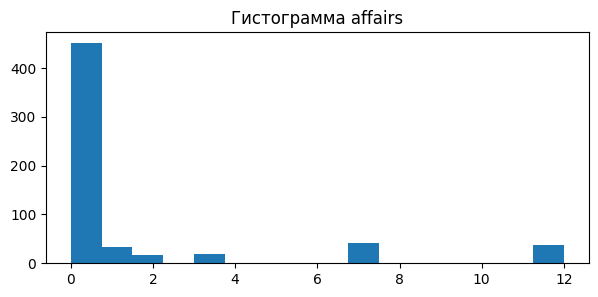

In [111]:
def plot_hist(feature='affairs', bins=16):
    plt.figure(figsize=(7,3))
    plt.hist(df[feature], bins=bins)
    plt.title(f'Гистограмма {feature}')
    plt.show()

plot_hist('affairs')

*Действительно нулей много. Впрочем, это хорошо)))*  
*Оставим только изменщиков*  

In [112]:
print(len(df), end=' -> ')
df = df[df.affairs>0]
print(len(df))

601 -> 150


**1.** С помощью F-критерия исследуйте, по каким факторам наблюдается различие по доли времени, проведенного во внебрачных отношениях.

In [113]:
sm.stats.anova_lm(ols(f"affairs ~ {' + '.join(features)}", data=df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,19.471154,19.471154,1.227951,0.269693
children,1.0,0.029498,0.029498,0.001860,0.965658
age,1.0,97.057880,97.057880,6.120969,0.014546
yearsmarried,1.0,122.531627,122.531627,7.727474,0.006181
religiousness,1.0,102.114041,102.114041,6.439837,0.012246
education,1.0,14.814847,14.814847,0.934300,0.335403
occupation,1.0,29.605409,29.605409,1.867069,0.173986
rating,1.0,77.425446,77.425446,4.882847,0.028738
Residual,141.0,2235.783431,15.856620,NaN,NaN


*Факторы, по которым наблюдаем различие: age, yearsmarried, religiousness, rating*

**2.** По факторам, для которых нашлось статистически значимое отличие, проведите post-hoc анализ для выявления уровня факторов, для которых различается целевой признак.

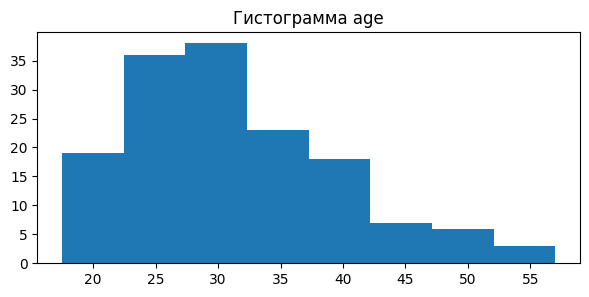

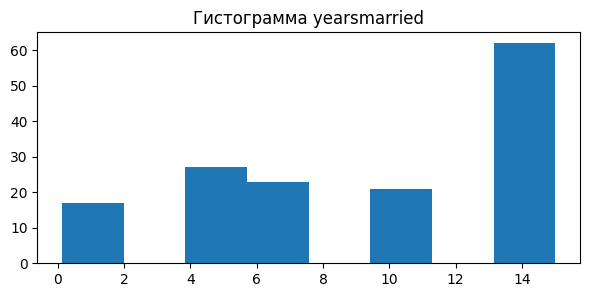

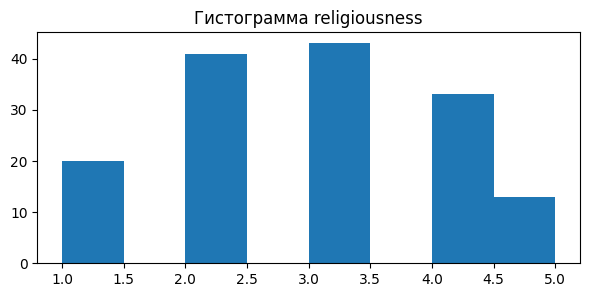

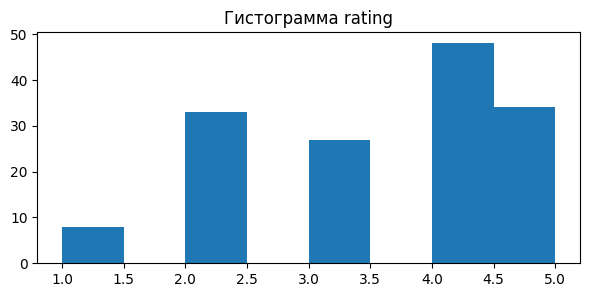

In [114]:
for f in ['age','yearsmarried','religiousness','rating']:
    plot_hist(f, bins=8)

*Логичными кажутся такие разбиения \ бинарные факторы измен*

In [115]:
for a,b in zip(['young','married_for_long','not_religious','bad_rating'],['age','yearsmarried','religiousness','rating']):
    df[a] = (df[b] < df[b].mean()).astype(int)
    print(a)
    display(sm.OLS(df.affairs, sm.add_constant(df[[a]])).fit().summary())

young


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     8.137
Date:                Sun, 16 Mar 2025   Prob (F-statistic):            0.00496
Time:                        19:15:25   Log-Likelihood:                -425.57
No. Observations:                 150   AIC:                             855.1
Df Residuals:                     148   BIC:                             861.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0702      0.551     12.839      0.000       5.982       8.158
young         -1.9949      0.699     -2.852      0.005      -3.377      -0.613
==============================================================================
Omnibus:                       75.503   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.298
Skew:                           0.335   Prob(JB):                      0.00214
Kurtosis:                       1.768   Cond. No.                         3.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

married_for_long


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     9.280
Date:                Sun, 16 Mar 2025   Prob (F-statistic):            0.00274
Time:                        19:15:25   Log-Likelihood:                -425.03
No. Observations:                 150   AIC:                             854.1
Df Residuals:                     148   BIC:                             860.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.7590      0.455     14.865      0.000       5.861       7.658
married_for_long    -2.0725      0.680     -3.046      0.003      -3.417      -0.728
==============================================================================
Omnibus:                       77.458   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.235
Skew:                           0.326   Prob(JB):                      0.00220
Kurtosis:                       1.763   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

not_religious


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.361
Date:                Sun, 16 Mar 2025   Prob (F-statistic):              0.127
Time:                        19:15:25   Log-Likelihood:                -428.40
No. Observations:                 150   AIC:                             860.8
Df Residuals:                     148   BIC:                             866.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.3933      0.449     12.010      0.000       4.506       6.281
not_religious     1.0822      0.704      1.537      0.127      -0.309       2.474
==============================================================================
Omnibus:                      140.916   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.021
Skew:                           0.338   Prob(JB):                     0.000902
Kurtosis:                       1.663   Cond. No.                         2.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

bad_rating


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     5.013
Date:                Sun, 16 Mar 2025   Prob (F-statistic):             0.0266
Time:                        19:15:25   Log-Likelihood:                -427.09
No. Observations:                 150   AIC:                             858.2
Df Residuals:                     148   BIC:                             864.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1341      0.464     11.070      0.000       4.218       6.051
bad_rating     1.5423      0.689      2.239      0.027       0.181       2.904
==============================================================================
Omnibus:                      123.880   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.123
Skew:                           0.301   Prob(JB):                      0.00141
Kurtosis:                       1.682   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Кол-во измен падает с ростом значений всех рассмотренных признаков*

**3.** Изучите совместное влияние факторов "количество лет в браке" и "количество детей" с помощью двухфактороного дисперсионного анализа. Оказывают ли какие-то уровни фактора совместное влияние?

In [116]:
sm.stats.anova_lm(ols("affairs ~ yearsmarried * children", data=df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
children,1.0,0.101626,0.101626,0.006225,0.937223
yearsmarried,1.0,222.211558,222.211558,13.610459,0.000317
yearsmarried:children,1.0,92.846936,92.846936,5.686875,0.018376
Residual,146.0,2383.673213,16.326529,NaN,NaN


*Влияние совместного фактора есть, но оно меньше, чем влияние одной продолжительноси брака*

**4.** Ответьте на предыдущий вопрос, сняв возможную зависимость от возраста человека и его религиозности, используя их в качестве ковариат.

In [117]:
sm.stats.anova_lm(ols("affairs ~ yearsmarried * children + religiousness + age", data=df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
children,1.0,0.101626,0.101626,0.006366,0.936519
yearsmarried,1.0,222.211558,222.211558,13.918981,0.000274
yearsmarried:children,1.0,92.846936,92.846936,5.815785,0.017143
religiousness,1.0,73.784422,73.784422,4.621740,0.033240
age,1.0,10.980172,10.980172,0.687781,0.408293
Residual,144.0,2298.908618,15.964643,NaN,NaN


*Как будто ничего кардинально не поменялось*

**5.** По результатам исследования сделайте выводы о семейной жизни.

*В этой задаче удалось провести анализ влияния различных факторов на измены. Кол-во измен падает с увеличением возраста, длины и качества брака, религиозности* 